# San Francisco Crimes Analysis, Modeling and Prediction

In [0]:
from csv import reader
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# File location and type
file_location = "/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476327815126,37.7196874952717,POINT (-122.476327815126 37.7196874952717),11030874275000
090316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411339562557,37.7812707434494,POINT (-122.411339562557 37.7812707434494),9031691463010
130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435187699349,37.7626702770872,POINT (-122.435187699349 37.7626702770872),13013231115200
080052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886357981,37.7649178909424,POINT (-122.421886357981 37.7649178909424),8005283365016
070535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935404044,37.7516932889916,POINT (-122.413935404044 37.7516932889916),7053577015200
130407330,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,05/17/2013,21:56,SOUTHERN,"ARREST, CITED",500 Block of STEVENSON ST,-122.410793915482,37.780832063096,POINT (-122.410793915482 37.780832063096),13040733065015
136080803,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,04/07/2013,12:30,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403404791479,37.775420706711,POINT (-122.403404791479 37.775420706711),13608080306244
071177357,FORGERY/COUNTERFEITING,"FORGERY, DRIVERS LICENSE OR ID-CARD",Friday,11/16/2007,17:00,NORTHERN,PROSECUTED BY OUTSIDE AGENCY,2500 Block of VANNESS AV,-122.423907410647,37.7990497607213,POINT (-122.423907410647 37.7990497607213),7117735709120
060606109,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,06/07/2006,19:45,NORTHERN,NONE,BUSH ST / BUCHANAN ST,-122.430170528945,37.7874391353148,POINT (-122.430170528945 37.7874391353148),6060610906243
050719825,ASSAULT,BATTERY OF A POLICE OFFICER,Tuesday,06/28/2005,01:02,BAYVIEW,"ARREST, BOOKED",NAPOLEON ST / EVANS AV,-122.396010154392,37.7472622922111,POINT (-122.396010154392 37.7472622922111),5071982504154


In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("sf_crime analysis").config("spark.some.config.option","some-value").getOrCreate()

df_opt1 = spark.read.format("csv").option("header","true").load("/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
display(df_opt1.take(3))
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476327815126,37.7196874952717,POINT (-122.476327815126 37.7196874952717),11030874275000
090316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411339562557,37.7812707434494,POINT (-122.411339562557 37.7812707434494),9031691463010
130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435187699349,37.7626702770872,POINT (-122.435187699349 37.7626702770872),13013231115200


**OLAP 1.1**
Count the number of crimes for different categories.

In [0]:
q1_result=df.groupBy('Category').count().orderBy('count',ascending=False)
display(q1_result)

Category,count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [0]:
crimeCategory = spark.sql("select category, count(*) as Count from sf_crime group by category order by Count Desc")
display(crimeCategory)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [0]:
crimes_sf_pd = crimeCategory.limit(5).toPandas()
display(crimes_sf_pd)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602


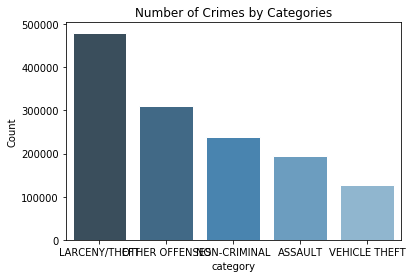

In [0]:
fig, ax =plt.subplots()
import seaborn as sns
sns.set_style("dark")
sns.barplot(x=crimes_sf_pd['category'], y=crimes_sf_pd['Count'],palette="Blues_d",ax=ax)
ax.set_title("Number of Crimes by Categories")
display()

**OLAP 1.2**
Count the number of crimes in different districts

In [0]:
q2_result=df.groupBy('PdDistrict').count().orderBy('count',ascending=False)
display(q2_result)

PdDistrict,count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [0]:
crimeDistrict = spark.sql("select PdDistrict, count(*) as Count from sf_crime group by PdDistrict order by Count Desc")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [0]:
crimes_district_df=crimeDistrict.toPandas()
display(crimes_district_df)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


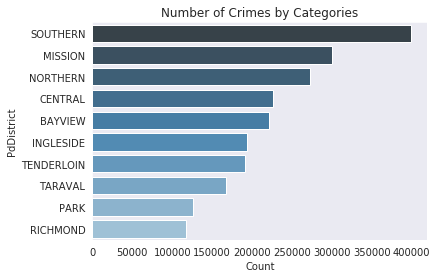

In [0]:
fig, ax = plt.subplots()
import seaborn as sns
sns.set_style("dark")
sns.barplot(x=crimes_district_df['Count'],y=crimes_district_df['PdDistrict'],palette='Blues_d',ax=ax)
ax.set_title("Number of Crimes by Categories")
display()

**OLAP 1.3**

Count the number of crimes in San Fransisco downtown area because I think downtown area will have more crimes.

In [0]:
from pyspark.sql.functions import hour, date_format, to_date,month,year
df_new1=df.withColumn('Longitude',df['X'].cast('double')) \
          .withColumn('Latitude',df['Y'].cast('double')) \
          .withColumn('Incident Date',to_date(df['Date'],"MM/dd/yyyy"))
df_new = df_new1.withColumn('month',month(df_new1['Incident Date']))
df_new = df_new.withColumn('year', year(df_new1['Incident Date']))
display(df_new)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Longitude,Latitude,Incident Date,month,year
110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476327815126,37.7196874952717,POINT (-122.476327815126 37.7196874952717),11030874275000,-122.476327815126,37.7196874952717,2011-04-15,4,2011
090316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411339562557,37.7812707434494,POINT (-122.411339562557 37.7812707434494),9031691463010,-122.411339562557,37.7812707434494,2009-03-26,3,2009
130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435187699349,37.7626702770872,POINT (-122.435187699349 37.7626702770872),13013231115200,-122.435187699349,37.7626702770872,2013-02-15,2,2013
080052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886357981,37.7649178909424,POINT (-122.421886357981 37.7649178909424),8005283365016,-122.421886357981,37.7649178909424,2008-01-15,1,2008
070535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935404044,37.7516932889916,POINT (-122.413935404044 37.7516932889916),7053577015200,-122.413935404044,37.7516932889916,2007-05-26,5,2007
130407330,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,05/17/2013,21:56,SOUTHERN,"ARREST, CITED",500 Block of STEVENSON ST,-122.410793915482,37.780832063096,POINT (-122.410793915482 37.780832063096),13040733065015,-122.410793915482,37.780832063096,2013-05-17,5,2013
136080803,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,04/07/2013,12:30,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403404791479,37.775420706711,POINT (-122.403404791479 37.775420706711),13608080306244,-122.403404791479,37.775420706711,2013-04-07,4,2013
071177357,FORGERY/COUNTERFEITING,"FORGERY, DRIVERS LICENSE OR ID-CARD",Friday,11/16/2007,17:00,NORTHERN,PROSECUTED BY OUTSIDE AGENCY,2500 Block of VANNESS AV,-122.423907410647,37.7990497607213,POINT (-122.423907410647 37.7990497607213),7117735709120,-122.423907410647,37.7990497607213,2007-11-16,11,2007
060606109,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,06/07/2006,19:45,NORTHERN,NONE,BUSH ST / BUCHANAN ST,-122.430170528945,37.7874391353148,POINT (-122.430170528945 37.7874391353148),6060610906243,-122.430170528945,37.7874391353148,2006-06-07,6,2006
050719825,ASSAULT,BATTERY OF A POLICE OFFICER,Tuesday,06/28/2005,01:02,BAYVIEW,"ARREST, BOOKED",NAPOLEON ST / EVANS AV,-122.396010154392,37.7472622922111,POINT (-122.396010154392 37.7472622922111),5071982504154,-122.396010154392,37.7472622922111,2005-06-28,6,2005


In [0]:
sf_downtown = (df_new.Longitude>=-122.4087) & (df_new.Longitude<= -122.3933) & (df_new.Latitude<=37.7966) & (df_new.Latitude>= 37.7936 )
q3_result= df_new.filter((df_new.DayOfWeek=='Sunday') & (sf_downtown)).groupBy('Incident Date','DayOfWeek').count().orderBy('Incident Date')
display(q3_result)

Incident Date,DayOfWeek,count
2003-01-12,Sunday,3
2003-01-19,Sunday,2
2003-01-26,Sunday,2
2003-02-02,Sunday,2
2003-02-16,Sunday,4
2003-02-23,Sunday,6
2003-03-02,Sunday,1
2003-03-09,Sunday,4
2003-03-16,Sunday,3
2003-03-23,Sunday,1


In [0]:
crimeSunDT = spark.sql("select Date, DayOfWeek, count(*) as Count from sf_crime where DayOfWeek = 'Sunday' And X>=-122.4087 and X<=-122.3933 and Y<= 37.7966 and Y>=37.7936 group by Date, DayOfWeek order by Date")
display(crimeSunDT)

Date,DayOfWeek,Count
01/01/2006,Sunday,18
01/01/2012,Sunday,9
01/01/2017,Sunday,4
01/02/2005,Sunday,2
01/02/2011,Sunday,2
01/03/2010,Sunday,2
01/04/2004,Sunday,8
01/04/2009,Sunday,1
01/04/2015,Sunday,4
01/05/2014,Sunday,2


**OLAP 1.4**

Conduct data analysis of the number of crimes from 2015 to 2018 and generate data visulazation.

In [0]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.year.isin(years)]
display(df_years.take(3))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Longitude,Latitude,Incident Date,month,year
150110228,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Thursday,02/05/2015,04:30,MISSION,NONE,MISSION ST / 16TH ST,-122.419671780296,37.7650501214668,POINT (-122.419671780296 37.7650501214668),15011022806243,-122.419671780296,37.7650501214668,2015-02-05,2,2015
150110256,ASSAULT,THREATS AGAINST LIFE,Wednesday,02/04/2015,09:30,MISSION,NONE,24TH ST / POTRERO AV,-122.406338412685,37.7530042877223,POINT (-122.406338412685 37.7530042877223),15011025619057,-122.406338412685,37.7530042877223,2015-02-04,2,2015
150110234,BURGLARY,"BURGLARY,FLAT UNDER CONSTRUCTION, FORCIBLE ENTRY",Wednesday,02/04/2015,16:01,CENTRAL,NONE,100 Block of MAIDEN LN,-122.405933099548,37.7881841508921,POINT (-122.405933099548 37.7881841508921),15011023405121,-122.405933099548,37.7881841508921,2015-02-04,2,2015


In [0]:
df_breakdown = df_years.groupby(['month','year']).count().orderBy('year','month')
display(df_breakdown)

month,year,count
1,2015,13606
2,2015,12329
3,2015,13929
4,2015,12959
5,2015,13729
6,2015,13304
7,2015,13365
8,2015,13730
9,2015,12896
10,2015,13147


In [0]:
crime_year_month= spark.sql("select substring(Date,1,2) as Month, substring(Date,7,4) as Year, count(*) as Count from sf_crime group by Year, Month having Year in (2015,2016,2017,2018) order by Year, Month")
display(crime_year_month)

Month,Year,Count
01,2015,13606
02,2015,12329
03,2015,13929
04,2015,12959
05,2015,13729
06,2015,13304
07,2015,13365
08,2015,13730
09,2015,12896
10,2015,13147


In [0]:
from pyspark.sql.functions import to_timestamp
df_new1=df_new.withColumn('Incident Time',to_timestamp(df['Time'],'HH:mm'))
df_new1=df_new1.withColumn('Hour',hour(df_new1['Incident Time']))
display(df_new1)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Longitude,Latitude,Incident Date,month,year,Incident Time,Hour
110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476327815126,37.7196874952717,POINT (-122.476327815126 37.7196874952717),11030874275000,-122.476327815126,37.7196874952717,2011-04-15,4,2011,1970-01-01T16:00:00.000+0000,16
090316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411339562557,37.7812707434494,POINT (-122.411339562557 37.7812707434494),9031691463010,-122.411339562557,37.7812707434494,2009-03-26,3,2009,1970-01-01T12:28:00.000+0000,12
130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435187699349,37.7626702770872,POINT (-122.435187699349 37.7626702770872),13013231115200,-122.435187699349,37.7626702770872,2013-02-15,2,2013,1970-01-01T02:00:00.000+0000,2
080052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886357981,37.7649178909424,POINT (-122.421886357981 37.7649178909424),8005283365016,-122.421886357981,37.7649178909424,2008-01-15,1,2008,1970-01-01T20:13:00.000+0000,20
070535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935404044,37.7516932889916,POINT (-122.413935404044 37.7516932889916),7053577015200,-122.413935404044,37.7516932889916,2007-05-26,5,2007,1970-01-01T18:10:00.000+0000,18
130407330,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,05/17/2013,21:56,SOUTHERN,"ARREST, CITED",500 Block of STEVENSON ST,-122.410793915482,37.780832063096,POINT (-122.410793915482 37.780832063096),13040733065015,-122.410793915482,37.780832063096,2013-05-17,5,2013,1970-01-01T21:56:00.000+0000,21
136080803,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,04/07/2013,12:30,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403404791479,37.775420706711,POINT (-122.403404791479 37.775420706711),13608080306244,-122.403404791479,37.775420706711,2013-04-07,4,2013,1970-01-01T12:30:00.000+0000,12
071177357,FORGERY/COUNTERFEITING,"FORGERY, DRIVERS LICENSE OR ID-CARD",Friday,11/16/2007,17:00,NORTHERN,PROSECUTED BY OUTSIDE AGENCY,2500 Block of VANNESS AV,-122.423907410647,37.7990497607213,POINT (-122.423907410647 37.7990497607213),7117735709120,-122.423907410647,37.7990497607213,2007-11-16,11,2007,1970-01-01T17:00:00.000+0000,17
060606109,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,06/07/2006,19:45,NORTHERN,NONE,BUSH ST / BUCHANAN ST,-122.430170528945,37.7874391353148,POINT (-122.430170528945 37.7874391353148),6060610906243,-122.430170528945,37.7874391353148,2006-06-07,6,2006,1970-01-01T19:45:00.000+0000,19
050719825,ASSAULT,BATTERY OF A POLICE OFFICER,Tuesday,06/28/2005,01:02,BAYVIEW,"ARREST, BOOKED",NAPOLEON ST / EVANS AV,-122.396010154392,37.7472622922111,POINT (-122.396010154392 37.7472622922111),5071982504154,-122.396010154392,37.7472622922111,2005-06-28,6,2005,1970-01-01T01:02:00.000+0000,1


In [0]:
dates = ['12/11/2017','12/11/2016','12/11/2015']
df_days = df_new1[df_new1.Date.isin(dates)]
df_hours = df_days.groupby('Hour','Date').count().orderBy('Date','Hour')
display(df_hours)

Hour,Date,count
0,12/11/2015,14
1,12/11/2015,11
2,12/11/2015,7
3,12/11/2015,10
4,12/11/2015,10
5,12/11/2015,2
6,12/11/2015,3
7,12/11/2015,5
8,12/11/2015,19
9,12/11/2015,15


In [0]:
cirme_hour_date=spark.sql("select substring(Time,1,2) as Hour, substring(Date,1,5) as Day, substring(Date,7,4) as Year, count(*) as Count from sf_crime where substring(Date,1,5) = '07/15' group by Hour,Day, Year order by Hour")
display(cirme_hour_date)

Hour,Day,Year,Count
00,07/15,2017,24
00,07/15,2009,34
00,07/15,2008,22
00,07/15,2016,17
00,07/15,2015,22
00,07/15,2006,19
00,07/15,2014,19
00,07/15,2013,28
00,07/15,2004,11
00,07/15,2003,26


In [0]:
from pyspark.sql import functions as F
danger_yearly = df_new1.groupby('PdDistrict','year').count().orderBy('year','count',ascending = False)
display(danger_yearly)

PdDistrict,year,count
SOUTHERN,2018,8577
MISSION,2018,6504
NORTHERN,2018,6227
CENTRAL,2018,6140
BAYVIEW,2018,4105
INGLESIDE,2018,3758
TARAVAL,2018,3487
TENDERLOIN,2018,2898
RICHMOND,2018,2505
PARK,2018,2467


In [0]:
district_count=df_new1.groupby('PdDistrict').count().orderBy('count',ascending = False)
district_count.show()

+----------+------+
PdDistrict| count|
+----------+------+
 SOUTHERN|399785|
 MISSION|300076|
 NORTHERN|272713|
 CENTRAL|226255|
 BAYVIEW|221000|
 INGLESIDE|194180|
TENDERLOIN|191746|
 TARAVAL|166971|
 PARK|125479|
 RICHMOND|116818|
 null| 1|
+----------+------+

In [0]:
district_top3=district_count.take(3)
district_top3_name=[district_top3[i][0] for i in range(3)]
district_top3_name

Out[24]: ['SOUTHERN', 'MISSION', 'NORTHERN']

In [0]:
cirme_per_hour=df_new1.filter(df_new1.PdDistrict.isin(district_top3_name)).groupby('PdDistrict','Hour').count().orderBy('PdDistrict','Hour')
display(cirme_per_hour)

PdDistrict,Hour,count
MISSION,0,16797
MISSION,1,11125
MISSION,2,8930
MISSION,3,5599
MISSION,4,3920
MISSION,5,3089
MISSION,6,4791
MISSION,7,7449
MISSION,8,10647
MISSION,9,11453


In [0]:
crime_per_hour_df=cirme_per_hour.toPandas()
crime_per_hour_df.head()

Out[26]:

,PdDistrict,Hour,count
0,MISSION,0,16797
1,MISSION,1,11125
2,MISSION,2,8930
3,MISSION,3,5599
4,MISSION,4,3920


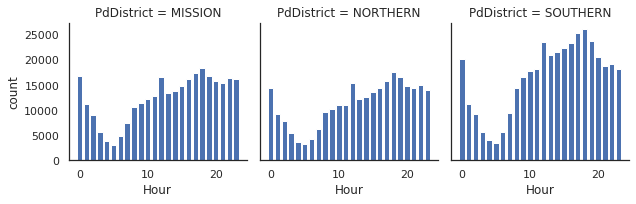

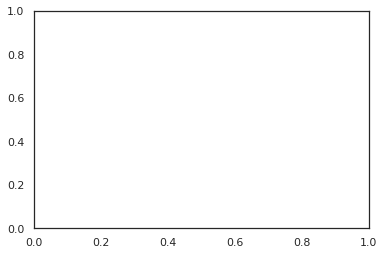

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax=plt.subplots()
g=sns.FacetGrid(crime_per_hour_df,col='PdDistrict')
g.map(plt.bar,'Hour','count')
display(g.fig)

In [0]:
crimes_cat=df_new1.filter(df_new1.PdDistrict.isin(district_top3_name)).groupby('PdDistrict','Category').count().orderBy('PdDistrict','Count',ascending=False)

from pyspark.sql.window import Window
from pyspark.sql.functions import rank,col

window=Window.partitionBy(crimes_cat['PdDistrict']).orderBy(crimes_cat['count'].desc())
top_5_cat=crimes_cat.select('*',rank().over(window).alias('rank')).filter(col('rank')<=5)
display(top_5_cat)

PdDistrict,Category,count,rank
MISSION,LARCENY/THEFT,48960,1
MISSION,OTHER OFFENSES,47363,2
MISSION,NON-CRIMINAL,31911,3
MISSION,ASSAULT,28791,4
MISSION,DRUG/NARCOTIC,19251,5
NORTHERN,LARCENY/THEFT,80988,1
NORTHERN,OTHER OFFENSES,30973,2
NORTHERN,NON-CRIMINAL,26485,3
NORTHERN,ASSAULT,21058,4
NORTHERN,VEHICLE THEFT,14820,5


In [0]:
top_category_per_hour=df_new1.filter(df_new1.PdDistrict.isin(district_top3_name)).groupby('PdDistrict','Hour','Category').count().orderBy('PdDistrict','Hour','Count',ascending=False)
display(top_category_per_hour)

PdDistrict,Hour,Category,count
SOUTHERN,23,LARCENY/THEFT,5669
SOUTHERN,23,OTHER OFFENSES,2431
SOUTHERN,23,NON-CRIMINAL,1995
SOUTHERN,23,ASSAULT,1398
SOUTHERN,23,VANDALISM,1146
SOUTHERN,23,WARRANTS,816
SOUTHERN,23,VEHICLE THEFT,801
SOUTHERN,23,DRUG/NARCOTIC,794
SOUTHERN,23,ROBBERY,533
SOUTHERN,23,SUSPICIOUS OCC,471


In [0]:
from pyspark.sql.functions import when
import numpy as np
test = df_new1
test = test.withColumn('Latitude', when(test.Latitude==90,np.nan).otherwise(test.Latitude))
test = test.withColumn('Longitude', when(test.Longitude==-120.5,np.nan).otherwise(test.Longitude))

In [0]:
from pyspark.sql.functions import col,avg
avg_lat = df_new1.select(avg(df_new1.Latitude)).collect()[0][0] 
avg_long = df_new1.select(avg(df_new1.Longitude)).collect()[0][0] 

In [0]:
test = test.withColumn('Latitude', when(test.Latitude == np.nan,avg_lat).otherwise(test.Latitude))
test = test.withColumn('Longitude', when(test.Longitude == np.nan,avg_long).otherwise(test.Longitude))

In [0]:
from pyspark.sql.functions import avg
a = avg(test.Longitude)
test.select(a).show()

+-------------------+
 avg(Longitude)|
+-------------------+
-122.42300857230555|
+-------------------+

In [0]:
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=["Latitude", "Longitude"], outputCol="features")
new_df = vecAssembler.transform(test)

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans().setK(8).setSeed(1)
model = kmeans.fit(new_df)

predictions = model.transform(new_df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.5435307943721606
Cluster Centers: 
[ 37.72382727 -122.45037825]
[ 37.78319127 -122.40736982]
[ 37.72842022 -122.39720187]
[ 37.75439729 -122.49235335]
[ 37.79575902 -122.42192465]
[ 37.75722592 -122.41455886]
[ 37.77407994 -122.46446131]
[ 37.77354918 -122.43404307]

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)

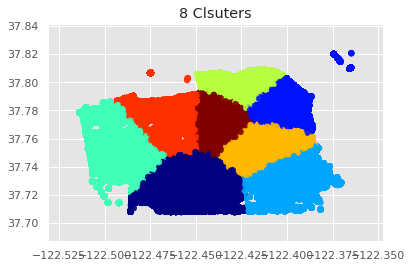

In [0]:
import matplotlib.pyplot as plt
#from ggplot import *
import warnings
plt.style.use('ggplot')

q8_res = predictions.toPandas()

fig, ax = plt.subplots()
ax.scatter(q8_res['Longitude'], q8_res['Latitude'], c=(q8_res['prediction']),cmap=plt.cm.jet, alpha=0.9)
ax.set_title("8 Clsuters")
display()

In [0]:
df.dtypes

Out[3]: [('IncidntNum', 'string'),
 ('Category', 'string'),
 ('Descript', 'string'),
 ('DayOfWeek', 'string'),
 ('Date', 'string'),
 ('Time', 'string'),
 ('PdDistrict', 'string'),
 ('Resolution', 'string'),
 ('Address', 'string'),
 ('X', 'string'),
 ('Y', 'string'),
 ('Location', 'string'),
 ('PdId', 'string')]

In [0]:
df.printSchema()

root
-- IncidntNum: string (nullable = true)
-- Category: string (nullable = true)
-- Descript: string (nullable = true)
-- DayOfWeek: string (nullable = true)
-- Date: string (nullable = true)
-- Time: string (nullable = true)
-- PdDistrict: string (nullable = true)
-- Resolution: string (nullable = true)
-- Address: string (nullable = true)
-- X: string (nullable = true)
-- Y: string (nullable = true)
-- Location: string (nullable = true)
-- PdId: string (nullable = true)

In [0]:
for col in df.columns:
  print(col,":",df.filter(df[col].isNull()).count())

IncidntNum : 0
Category : 0
Descript : 0
DayOfWeek : 0
Date : 0
Time : 0
PdDistrict : 1
Resolution : 0
Address : 0
X : 0
Y : 0
Location : 0
PdId : 0

**Time Series Analysis of San Francisco Crimes**

In [0]:
df_pd=df.toPandas()

In [0]:
df_pd.isnull().sum()

Out[4]: IncidntNum 0
Category 0
Descript 0
DayOfWeek 0
Date 0
Time 0
PdDistrict 1
Resolution 0
Address 0
X 0
Y 0
Location 0
PdId 0
dtype: int64

In [0]:
df_pd.Location[df_pd.PdDistrict.isnull()]

Out[5]: 1031781 POINT (-122.4133519852842 37.70820245849022)
Name: Location, dtype: object

In [0]:
df_pd.PdDistrict.fillna("INGLESIDE",inplace=True)

In [0]:
df_pd.isnull().sum()

Out[7]: IncidntNum 0
Category 0
Descript 0
DayOfWeek 0
Date 0
Time 0
PdDistrict 0
Resolution 0
Address 0
X 0
Y 0
Location 0
PdId 0
dtype: int64

In [0]:
df_pd.Date = df_pd.Date.map(lambda x : x.split('/')[2] + '-' + x.split('/')[0] + '-' + x.split('/')[1])
df_pd['Month'] = df_pd.Date.map(lambda x: int(x.split('-')[1]))

monthly_count = df_pd.Month[df_pd.Date<'2018'].value_counts()
monthly_count

Out[8]: 10 190470
8 187379
3 186840
1 185553
5 184103
9 183437
7 181822
4 179528
11 175032
6 174744
12 170776
2 168672
Name: Month, dtype: int64

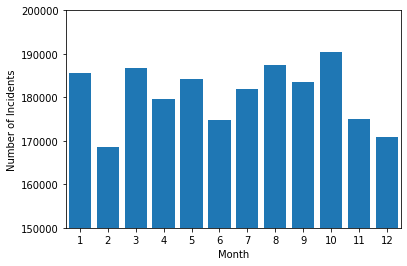

In [0]:
fig = plt.figure()
plt.bar(sorted(monthly_count.index),monthly_count.values[np.argsort(monthly_count.index)])
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xlim(0.5,12.5)
plt.ylim(150000,200000)
plt.xticks(np.arange(1,13))
plt.show()

In [0]:
df_pd['Time_float']=df_pd.Time.map(lambda x: int(x.split(':')[0]) + float(x.split(':')[1])/60)

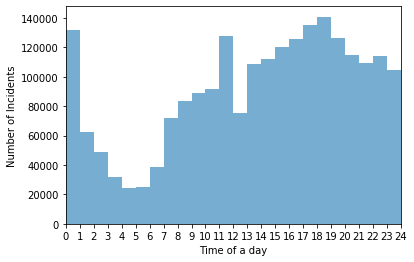

In [0]:
fig = plt.figure()
plt.hist(df_pd['Time_float'], bins=24, alpha = 0.6)
plt.xlabel('Time of a day')
plt.ylabel('Number of Incidents')
plt.xlim((0.0, 24))
plt.xticks( np.arange(0,25) )
plt.show()

In [0]:
df_pd_new = df_pd[df_pd['Y'] < '80']

In [0]:
print(df_pd.Date.min())

2003-01-01

In [0]:
print(df_pd.Date.max())

2018-05-15

In [0]:
print("Total days is", (pd.to_datetime('2018-05-15')-pd.to_datetime('2003-01-01')).days+1)

Total days is 5614

In [0]:
time_span= pd.date_range('2003-01-01','2018-05-15')

def df_to_TimeSeries(df):
  date=pd.to_datetime(df.Date.value_counts().index)
  index=sorted(date)
  data=df.Date.value_counts().values[np.argsort(date)]
  ts = pd.DataFrame(data=data,index=index,columns=['count'])
  ts=ts.reindex(time_span,fill_value=0)
  return ts

In [0]:
all_counts=df_to_TimeSeries(df_pd)

In [0]:
all_counts[all_counts['count']==0]

Out[18]:

,count
2009-06-10,0


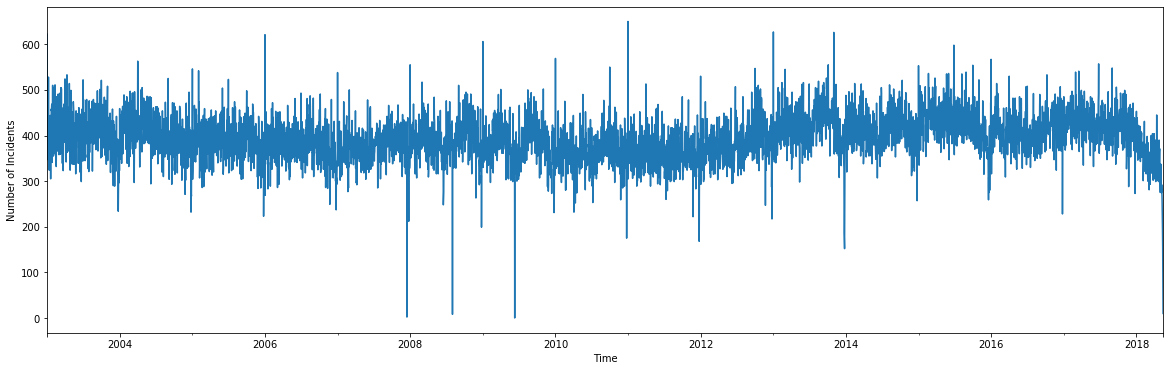

In [0]:
fig = plt.figure(figsize=(20,6))
all_counts['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.show()

In [0]:
df_pd_theft = df_pd.loc[(df_pd['Category'] == 'LARCENY/THEFT'), :]

In [0]:
theft_counts=df_to_TimeSeries(df_pd_theft)

In [0]:
theft_counts[theft_counts.index=='2007-12-16']

Out[22]:

,count
2007-12-16,0


In [0]:
theft_counts[theft_counts['count']==0]

Out[23]:

,count
2007-12-16,0
2009-06-10,0
2018-05-15,0


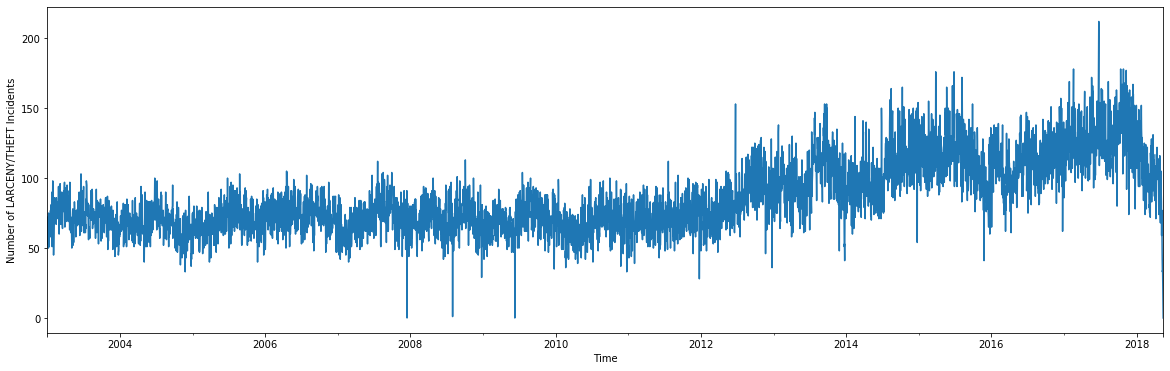

In [0]:
fig = plt.figure(figsize=(20,6))
theft_counts['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of LARCENY/THEFT Incidents')
plt.show()

In [0]:
df_assault = df_pd.loc[(df_pd['Category'] == 'ASSAULT'), :]
assault_counts = df_to_TimeSeries(df_assault)
assault_counts[assault_counts['count'] == 0]

Out[25]:

,count
2007-12-16,0
2008-08-01,0
2009-06-10,0
2018-05-15,0


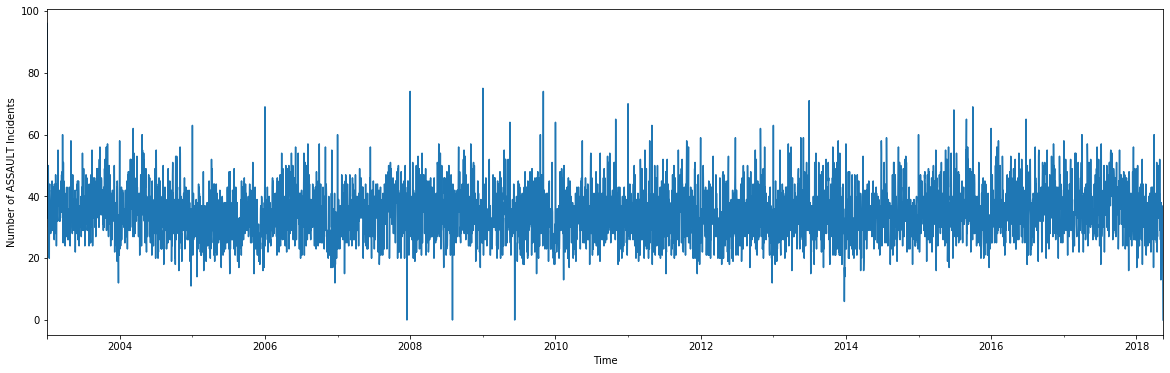

In [0]:
fig = plt.figure(figsize=(20,6))
assault_counts['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of ASSAULT Incidents')
plt.show()

In [0]:
df_drug = df_pd.loc[(df_pd['Category'] == 'DRUG/NARCOTIC'), :]

drug_counts = df_to_TimeSeries(df_drug)
drug_counts[drug_counts['count'] == 0]

Out[27]:

,count
2007-12-16,0
2008-08-01,0
2009-06-10,0
2017-01-26,0
2017-08-22,0
2017-08-27,0


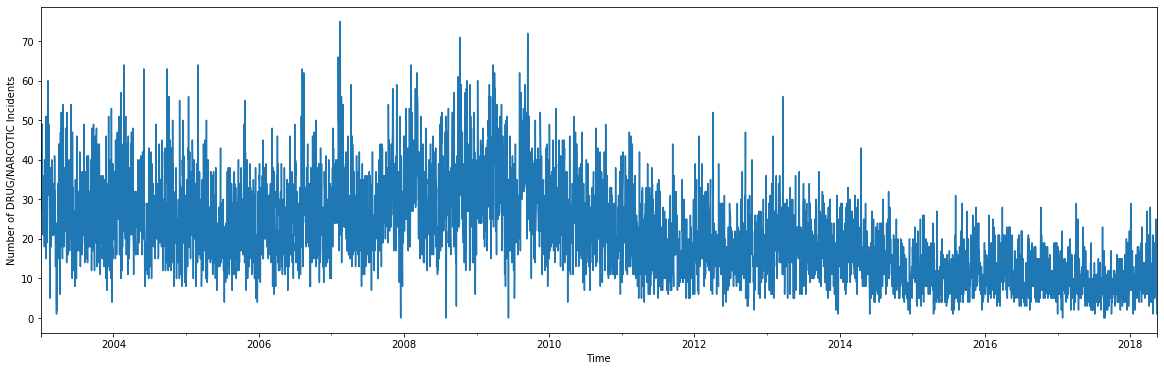

In [0]:
fig = plt.figure(figsize=(20,6))
drug_counts['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of DRUG/NARCOTIC Incidents')
plt.show()

In [0]:
y=theft_counts.resample('MS').sum()

In [0]:
y.tail()

Out[30]:

,count
2018-01-01,3820
2018-02-01,2914
2018-03-01,3104
2018-04-01,2922
2018-05-01,872


In [0]:
y=y[:-1]

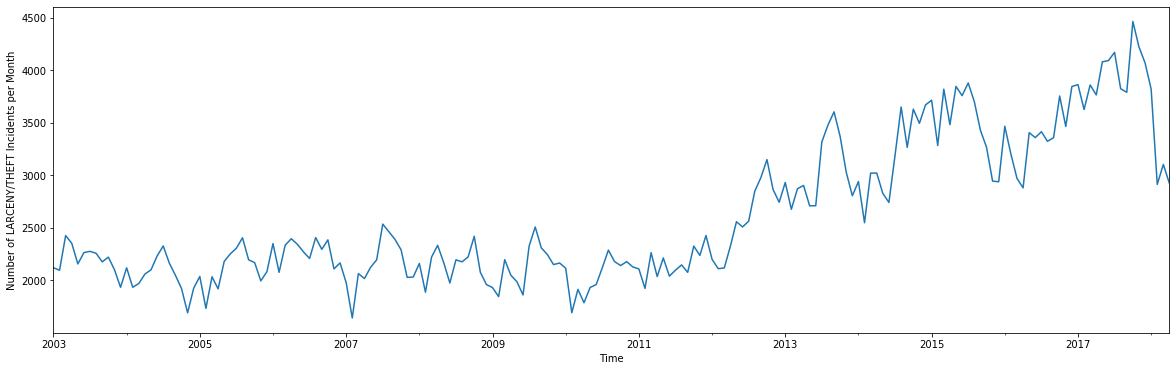

In [0]:
fig = plt.figure(figsize=(20,6))
y['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of LARCENY/THEFT Incidents per Month')
plt.show()

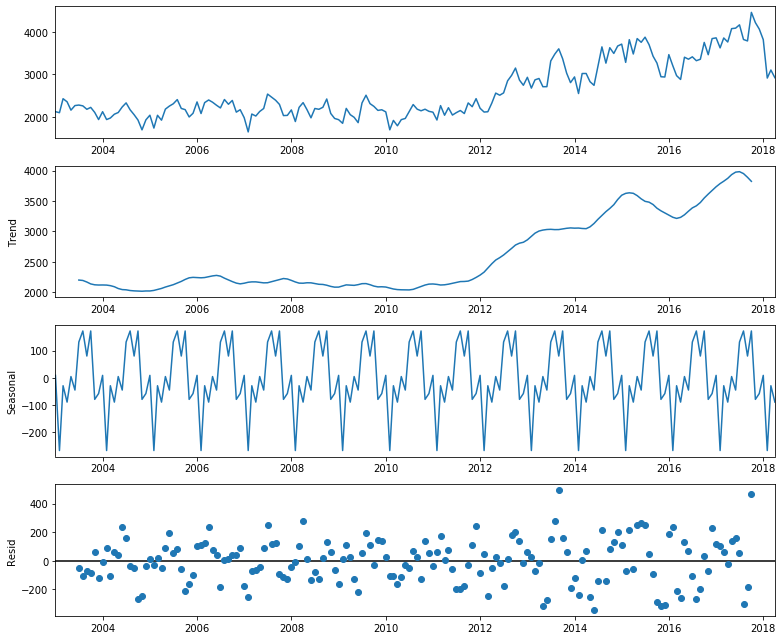

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize']=11,9
decomposition = seasonal_decompose(y,model='additive')
decomposition.plot()
plt.show()

In [0]:
y_past,y_future=y[:-12],y[-12:]

In [0]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [0]:
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")
aic_min = float("inf")
param = (0,0,0,0,0,0)
best_model = None

for x1 in pdq:
    for x2 in seasonal_pdq:
        try:
            mod = SARIMAX(y_past,
                          order = x1,
                          seasonal_order = x2,
                          enforce_stationarity = False,
                          enforce_invertibility = False)
            results = mod.fit()
            print ("(p,d,q,P,D,Q,S) = {}: AIC = {}".format(x1 + x2, results.aic))
            if results.aic < aic_min:
                aic_min = results.aic
                param = x1 + x2
                best_model = mod
        except:
            continue

(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 0, 0, 12): AIC = 3175.8259813524046
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 0, 1, 12): AIC = 2783.156538604123
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 1, 0, 12): AIC = 2338.259089233441
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 1, 1, 12): AIC = 2165.147319915113
(p,d,q,P,D,Q,S) = (0, 0, 0, 1, 0, 0, 12): AIC = 2343.7912133069776
(p,d,q,P,D,Q,S) = (0, 0, 0, 1, 0, 1, 12): AIC = 2306.9576404138434
(p,d,q,P,D,Q,S) = (0, 0, 0, 1, 1, 0, 12): AIC = 2174.559549158229
(p,d,q,P,D,Q,S) = (0, 0, 0, 1, 1, 1, 12): AIC = 2158.8419002941982
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 0, 0, 12): AIC = 2948.2937219833375
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 0, 1, 12): AIC = 2600.455781057477
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 1, 0, 12): AIC = 2236.328800417331
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 1, 1, 12): AIC = 2061.9210298428297
(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 0, 0, 12): AIC = 2259.85346684256
(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 0, 1, 12): AIC = 2198.03527836701
(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 1, 0, 12): AIC = 2081.7818302854744
(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 1, 1, 12): AIC = 2054.3780319762436
(p,d,q,P,D,Q,S) = (0, 1, 0, 0, 0, 0, 12): AIC = 2314.331095714454
(p,d,q,P,D,Q,S) = (0, 1, 0, 0, 0, 1, 12): AIC = 2140.3612904278375
(p,d,q,P,D,Q,S) = (0, 1, 0, 0, 1, 0, 12): AIC = 2178.783925060642
(p,d,q,P,D,Q,S) = (0, 1, 0, 0, 1, 1, 12): AIC = 1944.786577316157
(p,d,q,P,D,Q,S) = (0, 1, 0, 1, 0, 0, 12): AIC = 2143.6244797181657
(p,d,q,P,D,Q,S) = (0, 1, 0, 1, 0, 1, 12): AIC = 2107.9188657342565
(p,d,q,P,D,Q,S) = (0, 1, 0, 1, 1, 0, 12): AIC = 1996.8161358797588
(p,d,q,P,D,Q,S) = (0, 1, 0, 1, 1, 1, 12): AIC = 1946.78483184985
(p,d,q,P,D,Q,S) = (0, 1, 1, 0, 0, 0, 12): AIC = 2286.023100158341
(p,d,q,P,D,Q,S) = (0, 1, 1, 0, 0, 1, 12): AIC = 2120.2489731978626
(p,d,q,P,D,Q,S) = (0, 1, 1, 0, 1, 0, 12): AIC = 2163.2741993420746
(p,d,q,P,D,Q,S) = (0, 1, 1, 0, 1, 1, 12): AIC = 1931.3933243934018
(p,d,q,P,D,Q,S) = (0, 1, 1, 1, 0, 0, 12): AIC = 2138.5440894597587
(p,d,q,P,D,Q,S) = (0, 1, 1, 1, 0, 1, 12): AIC = 2091.9266680162664
(p,d,q,P,D,Q,S) = (0, 1, 1, 1, 1, 0, 12): AIC = 1996.386431664844
(p,d,q,P,D,Q,S) = (0, 1, 1, 1, 1, 1, 12): AIC = 1933.3905734253858
(p,d,q,P,D,Q,S) = (1, 0, 0, 0, 0, 0, 12): AIC = 2328.9298840163174
(p,d,q,P,D,Q,S) = (1, 0, 0, 0, 0, 1, 12): AIC = 2156.2093404198313
(p,d,q,P,D,Q,S) = (1, 0, 0, 0, 1, 0, 12): AIC = 2179.72667984688
(p,d,q,P,D,Q,S) = (1, 0, 0, 0, 1, 1, 12): AIC = 1958.9787980496862
(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 0, 0, 12): AIC = 2145.589186820099
(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 0, 1, 12): AIC = 2119.0151641137
(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 1, 0, 12): AIC = 1987.7865903619897
(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 1, 1, 12): AIC = 1960.968029076761
(p,d,q,P,D,Q,S) = (1, 0, 1, 0, 0, 0, 12): AIC = 2302.488491666257
(p,d,q,P,D,Q,S) = (1, 0, 1, 0, 0, 1, 12): AIC = 2134.819538125132
(p,d,q,P,D,Q,S) = (1, 0, 1, 0, 1, 0, 12): AIC = 2168.451008369884
(p,d,q,P,D,Q,S) = (1, 0, 1, 0, 1, 1, 12): AIC = 1945.8387782642444
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 0, 0, 12): AIC = 2140.3199948243837
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 0, 1, 12): AIC = 2107.3947627151642
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 1, 0, 12): AIC = 1989.7286543367268
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 1, 1, 12): AIC = 1947.7982549610556
(p,d,q,P,D,Q,S) = (1, 1, 0, 0, 0, 0, 12): AIC = 2302.6178686291987
(p,d,q,P,D,Q,S) = (1, 1, 0, 0, 0, 1, 12): AIC = 2133.2296966975455
(p,d,q,P,D,Q,S) = (1, 1, 0, 0, 1, 0, 12): AIC = 2178.3176564746273
(p,d,q,P,D,Q,S) = (1, 1, 0, 0, 1, 1, 12): AIC = 1945.5473102764136
(p,d,q,P,D,Q,S) = (1, 1, 0, 1, 0, 0, 12): AIC = 2126.133136653544
(p,d,q,P,D,Q,S) = (1, 1, 0, 1, 0, 1, 12): AIC = 2108.805601390704
(p,d,q,P,D,Q,S) = (1, 1, 0, 1, 1, 0, 12): AIC = 1983.7443374924196
(p,d,q,P,D,Q,S) = (1, 1, 0, 1, 1, 1, 12): AIC = 1947.5452036731315
(p,d,q,P,D,Q,S) = (1, 1, 1, 0, 0, 0, 12): AIC = 2285.9755211152415
(p,d,q,P,D,Q,S) = (1, 1, 1, 0, 0, 1, 12): AIC = 2120.327183066431
(p,d,q,P,D,Q,S) = (1, 1, 1, 0, 1, 0, 12): AIC = 2154.7768590018118
(p,d,q,P,D,Q,S) = (1, 1, 1, 0, 1, 1, 12): AIC = 1934.3498561380732
(p,d,q,P,D

In [0]:
print ("Best (p,d,q,P,D,Q,S) =", param)

Best (p,d,q,P,D,Q,S) = (1, 1, 1, 1, 1, 1, 12)

In [0]:
results = best_model.fit()
results.summary().tables[1]

Out[50]:

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.6553,0.151,4.347,0.000,0.360,0.951
ma.L1,-0.8431,0.110,-7.694,0.000,-1.058,-0.628
ar.S.L12,-0.0423,0.093,-0.457,0.648,-0.224,0.139
ma.S.L12,-0.9886,0.915,-1.080,0.280,-2.783,0.805
sigma2,2.838e+04,2.38e+04,1.193,0.233,-1.83e+04,7.5e+04


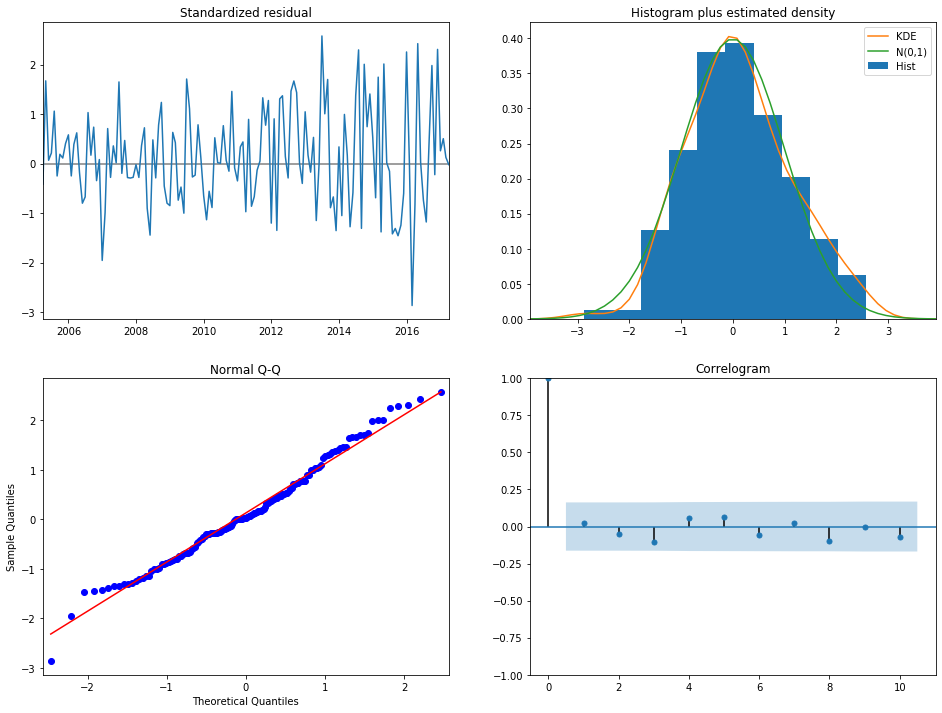

In [0]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y['count'].values[1:])
print ("-- Before taking the difference --")
print ("ADF Statistic:", result[0])
print ("p-value:", result[1])

diff = y.diff()
result = adfuller(diff['count'].values[1:])
print ("-- After taking the difference --")
print ("ADF Statistic:", result[0])
print ("p-value:", result[1])

-- Before taking the difference --
ADF Statistic: -1.0663200681527234
p-value: 0.7283145512232349
-- After taking the difference --
ADF Statistic: -3.5731946624059376
p-value: 0.00629465774645448

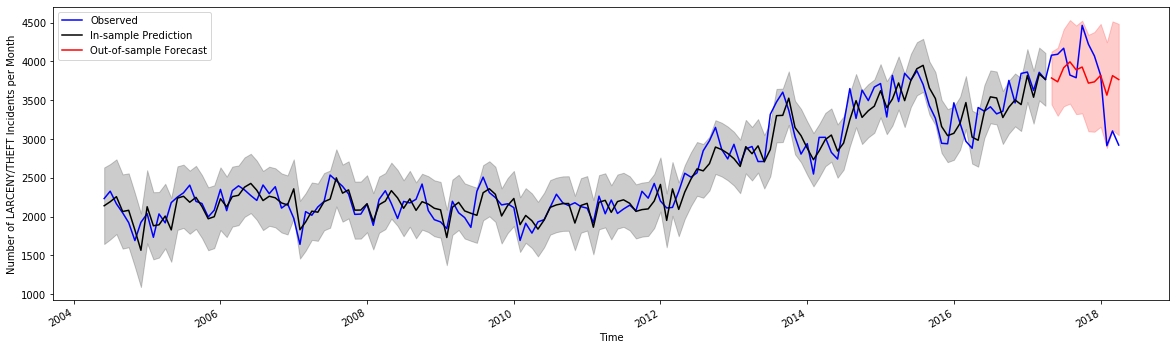

In [0]:
# neglect the beginning of the time series, where the model hasn't converged
pred = results.get_prediction(start = y_past['2004-06':].index[0],  dynamic=False)
pred_ci = pred.conf_int() # 95% confidence interval 

forecast = results.get_forecast(steps=12) # forecast for the next 12 months
forecast_ci = forecast.conf_int() # 95% confidence interval 

fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(y['2004-06':].index, y['2004-06':], label='Observed', color='b')

pred.predicted_mean.plot(ax=ax, label='In-sample Prediction', color='k')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

forecast.predicted_mean.plot(ax=ax, label='Out-of-sample Forecast', color='r')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='r', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('Number of LARCENY/THEFT Incidents per Month')
plt.legend()
plt.show()